In [1]:
from neuralprophet import NeuralProphet

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import pickle

In [3]:
df=pd.read_csv('Rajasthan_1990_2022_Jodhpur.csv')

In [4]:
df.head()

,time,tavg,tmin,tmax,prcp
0,01-01-1990,22.9,19.1,28.4,NaN
1,02-01-1990,21.7,NaN,26.5,0.0
2,03-01-1990,21.0,16.4,26.5,0.0
3,04-01-1990,20.8,NaN,27.4,0.0
4,05-01-1990,20.4,14.2,26.1,0.0


In [5]:
df.dtypes

time     object
tavg    float64
tmin    float64
tmax    float64
prcp    float64
dtype: object

In [6]:
df['time'] = pd.to_datetime(df['time'], format='%d-%m-%Y')

In [7]:
df.dtypes

time    datetime64[ns]
tavg           float64
tmin           float64
tmax           float64
prcp           float64
dtype: object

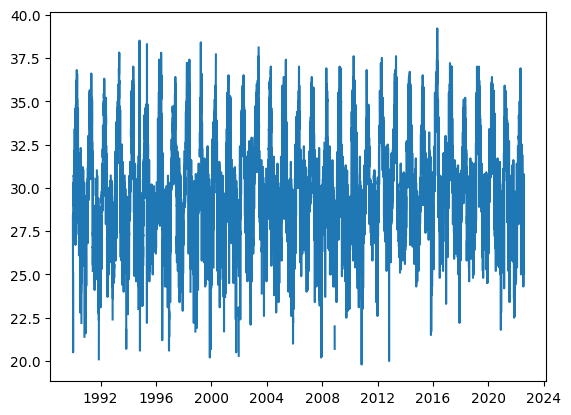

In [8]:
plt.plot(df['time'],df['tmax'])

In [9]:
data=df[['time','tmax']]
data.dropna(inplace=True)
data.columns=['ds','y']
data.head()

WARNING - (py.warnings._showwarnmsg) - C:\Users\Amey\AppData\Local\Temp\ipykernel_22772\2974680685.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)



,ds,y
0,1990-01-01,28.4
1,1990-01-02,26.5
2,1990-01-03,26.5
3,1990-01-04,27.4
4,1990-01-05,26.1


In [10]:
import torch


device = 'cuda' if torch.cuda.is_available() else 'cpu'


In [11]:
model=NeuralProphet()  #untrained neuralprophet model
model.fit(data,freq='D',epochs=1000)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 95.189% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (177) is too small than the required number                     for the learning rate finder (251). The results might not be optimal.


Finding best initial lr:   0%|          | 0/251 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,22.162945,25.956371,0.775657,0.0,0
1,19.696104,23.307585,0.657453,0.0,1
2,17.366913,20.783892,0.547107,0.0,2
3,15.027348,18.253132,0.442792,0.0,3
4,12.953892,15.977404,0.352113,0.0,4
...,...,...,...,...,...
995,1.302047,1.685302,0.004462,0.0,995
996,1.299905,1.683131,0.004453,0.0,996
997,1.297800,1.680948,0.004450,0.0,997
998,1.311533,1.693709,0.004498,0.0,998


In [12]:
future=model.make_future_dataframe(data,periods=900)
forecast=model.predict(future)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 90.765% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 162it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2022-07-26,None,33.941216,32.163898,1.750804,0.026511
1,2022-07-27,None,33.939556,32.163887,1.730030,0.045637
2,2022-07-28,None,33.916573,32.163879,1.713194,0.039502
3,2022-07-29,None,33.868851,32.163868,1.699834,0.005147
4,2022-07-30,None,33.754627,32.163857,1.689539,-0.098769


In [13]:
plot1=model.plot(forecast)


In [14]:
plot1


FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)', 'width': 2},
              'mode': 'lines',
              'name': 'yhat1',
              'type': 'scatter',
              'uid': '3ac9b94c-d16d-44a2-8b37-fe694db1dfb6',
              'x': array([datetime.datetime(2022, 7, 26, 0, 0),
                          datetime.datetime(2022, 7, 27, 0, 0),
                          datetime.datetime(2022, 7, 28, 0, 0), ...,
                          datetime.datetime(2025, 1, 8, 0, 0),
                          datetime.datetime(2025, 1, 9, 0, 0),
                          datetime.datetime(2025, 1, 10, 0, 0)], dtype=object),
              'y': array([30.04594 , 30.037334, 30.080923, ..., 30.86216 , 30.882042, 30.79123 ],
                         dtype=float32)},
             {'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'uid': '

In [12]:
with open('jodhpur_max_model.pkl','wb') as f:
    pickle.dump(model,f)